# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Loop Antennas
***

Similar to the linear wire antenna, the loop antenna is also easy to fabricate, easy to analyze, and inexpensive to build.  Loops are generally classified as either electrically small, where the circumference is less than a tenth of a wavelength, or electrically large, where the circumference is about a wavelength.  Small loops are not effective radiators and are usually used as probes or other receiving type elements, whereas the large circular loops are typically used in array configurations. 

### Small Circular Loop
Referring to Section 3.2.2.1, assume a small circular loop in the $x$-$y$ plane, as shown in Figure 3.8.  The wire is very thin such that the current distribution is $I_{\phi} = I_0$.  The electric and magnetic fields are written as (Equations 3.42 - 3.43)

\begin{align}
    E_{\phi} &= \eta \sin\theta\, I_0 \, (ka)^2 \, \frac{e^{-jkr}}{4r} \hspace{0.5in} \text{(V/m)}\label{eq:small_loop_E}\\ \nonumber \\
    H_{\theta} &= -\sin\theta\, I_0 \, (ka)^2 \, \frac{e^{-jkr}}{4r}\label{eq:small_loop_H} \hspace{0.5in} \text{(A/m)}
\end{align}

### Constant Current Loop
Referring to Section 3.2.2.2, consider a circular loop antenna with a radius that is not considered small but does have a constant current distribution.  Following the same procedure as for the small circular loop antenna allows the fields for a constant current loop antenna to be written as

\begin{align}
    E_{\phi} &= a\, k\, \eta\, I_0\, \frac{e^{-jkr}}{2r}\, J_1(k a \sin\theta) \hspace{0.5in} \text{(V/m)} \label{eq:efield_constant_current_loop} \\ \nonumber \\
    H_{\theta} &= -a\, k\, I_0\, \frac{e^{-jkr}}{2r}\, J_1(k a \sin\theta) \hspace{0.5in} \text{(A/m)}
\end{align}
***

Begin by getting the library path

In [1]:
import lib_path

Set the frequency (Hz), the radius (m) and the current (A) for the loop antenna

In [2]:
frequency = 1e9

radius = 0.1

current = 1.0

Set the angular span using the `linspace` routine from `scipy`

In [3]:
from numpy import linspace

from scipy.constants import pi

theta = linspace(0.0, 2.0 * pi, 1000)

Calculate the antenna parameters and antenna pattern using the `small_loop` and `circular_loop` routines

In [4]:
from Libs.antenna.loop import small_loop, circular_loop


antenna_type = 'small_loop'


if antenna_type == 'circular_loop':

    total_power_radiated = small_loop.radiated_power(frequency, radius, current)

    radiation_resistance = small_loop.radiation_resistance(frequency, radius)

    beamwidth = small_loop.beamwidth()

    directivity = small_loop.directivity()

    maximum_effective_aperture = small_loop.maximum_effective_aperture(frequency)

    _, _, ep, _, _, _ = small_loop.far_field(frequency, radius, current, 1e9, theta)
    

else:

    total_power_radiated = circular_loop.radiated_power(frequency, radius, current)

    radiation_resistance = circular_loop.radiation_resistance(frequency, radius)

    beamwidth = circular_loop.beamwidth(frequency, radius)

    directivity = circular_loop.directivity(frequency, radius)

    maximum_effective_aperture = circular_loop.maximum_effective_aperture(frequency, radius)

    _, _, ep, _, _, _ = circular_loop.far_field(frequency, radius, current, 1e9, theta)

Display the antenna parameters

In [5]:
print('Total Radiated Power (W)     {:.2f}'.format(total_power_radiated))

print('Radiation Resistance (Ohms)  {:.2f}'.format(radiation_resistance))

print('Beamwidth (deg)              {:.2f}'.format(beamwidth))

print('Directivity                  {:.2f}'.format(directivity))

print('Max Effective Aperture       {:.2e}'.format(maximum_effective_aperture))

Total Radiated Power (W)     620.55
Radiation Resistance (Ohms)  1241.11
Beamwidth (deg)              128.15
Directivity                  1.41
Max Effective Aperture       5.04e-03


Display the antenna pattern using the `matplotlib` routines

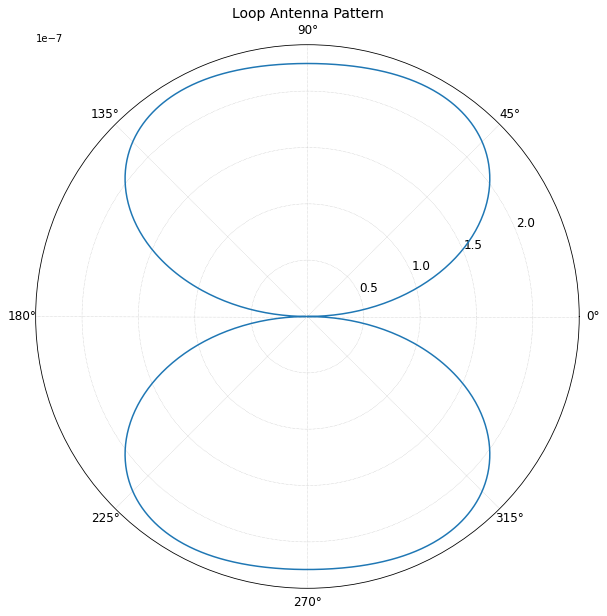

In [6]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the results

plt.polar(theta, abs(ep), '')



# Set the plot title and labels

plt.title('Loop Antenna Pattern', size=14)



# Set the tick label size
    
plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)